# NBA Analysis Project

Goal: **This project is aiming to predict which nba team will most likely win the 2020-2021 nba championship**

Project Planning: When starting a project, I like to outline the steps that I plan to take. This will allow me to break down the project into pieces and help me to minimize the time and effort when I'm debugging in an organized manner. The process is shown below:

1. Understand the nature of the data
2. Clean the data to obtain the most relevant information
3. Create as many plots as possible to visualize the data
4. Process missing data
5. Explore data
and more (to be continued...)

## Part 1: Data Cleaning

In [1]:
#import the dependencies and packages
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
print("Setup Complete")

Setup Complete


In [2]:
#Load the data using csv
games_details = pd.read_csv("games_details.csv")

#games = pd.read_csv("games.csv")
#players = pd.read_csv("players.csv")
#ranking = pd.read_csv("ranking.csv")
#teams = pd.read_csv("teams.csv")
print("games_details csv loaded")

games_details csv loaded


### Table 1: NBA Game Details

To start off, I want to get rid of some of the columns as they are just redundant information and aren't helpful for our data analysis. I also want to clean the data by removing the null data to ensure every data block has a meaning.

In [3]:
print("Title: Games_Details 615626 rows and 28 columns")
print(games_details.shape)

#get rid of start_position null value
games_details = games_details[games_details['START_POSITION'].notna()]
col_list = []
for col in games_details.columns:
    col_list.append(col.lower())
print(col_list)

games_details.pop("PLAYER_ID")
#games_details.pop("GAME_ID")
games_details.pop("TEAM_ID")
games_details.pop("COMMENT")

games_details.sort_values(by=['GAME_ID','TEAM_ABBREVIATION'],inplace=True)
games_details
#find the average of each numeric column
#games_details.mean()

Title: Games_Details 615626 rows and 28 columns
(615626, 28)
['game_id', 'team_id', 'team_abbreviation', 'team_city', 'player_id', 'player_name', 'start_position', 'comment', 'min', 'fgm', 'fga', 'fg_pct', 'fg3m', 'fg3a', 'fg3_pct', 'ftm', 'fta', 'ft_pct', 'oreb', 'dreb', 'reb', 'ast', 'stl', 'blk', 'to', 'pf', 'pts', 'plus_minus']


,GAME_ID,TEAM_ABBREVIATION,TEAM_CITY,PLAYER_NAME,START_POSITION,MIN,FGM,FGA,FG_PCT,FG3M,...,OREB,DREB,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS
543022,11400001,MIA,Miami,Luol Deng,F,24:50,2.0,7.0,0.286,0.0,...,2.0,1.0,3.0,1.0,2.0,0.0,0.0,0.0,4.0,-16.0
543023,11400001,MIA,Miami,Udonis Haslem,F,10:32,1.0,2.0,0.500,0.0,...,0.0,2.0,2.0,1.0,1.0,0.0,0.0,2.0,2.0,-8.0
543024,11400001,MIA,Miami,Chris Bosh,C,25:20,3.0,13.0,0.231,1.0,...,1.0,5.0,6.0,2.0,1.0,0.0,4.0,2.0,9.0,-10.0
543025,11400001,MIA,Miami,Dwyane Wade,G,20:31,2.0,7.0,0.286,0.0,...,0.0,2.0,2.0,3.0,0.0,0.0,1.0,1.0,6.0,-11.0
543026,11400001,MIA,Miami,Mario Chalmers,G,21:16,0.0,2.0,0.000,0.0,...,0.0,3.0,3.0,2.0,1.0,0.0,2.0,1.0,2.0,-6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
476,52000211,MEM,Memphis,Kyle Anderson,F,39:01,2.0,7.0,0.286,0.0,...,2.0,8.0,10.0,6.0,1.0,2.0,0.0,1.0,9.0,11.0
477,52000211,MEM,Memphis,Jaren Jackson Jr.,F,14:56,1.0,6.0,0.167,1.0,...,2.0,0.0,2.0,0.0,0.0,2.0,1.0,4.0,10.0,1.0
478,52000211,MEM,Memphis,Jonas Valanciunas,C,25:33,3.0,6.0,0.500,1.0,...,6.0,6.0,12.0,3.0,0.0,0.0,3.0,6.0,9.0,7.0
479,52000211,MEM,Memphis,Dillon Brooks,G,45:04,7.0,22.0,0.318,0.0,...,1.0,1.0,2.0,3.0,2.0,0.0,1.0,5.0,14.0,-1.0


As we can see, the column names can be very confusing, so just want to clarify full names of the abbreviations
* FGM: Field Goal Made
* FGA: Field Goal Attempt
* FG_PCT: Field Goal Percentage %
* FG3M: Field Goal 3 pointers Made
* FG3A: Field Goal 3 pointer Attempt
* FG3_PCT: Field Goal 3 pointers Percentage %
* FTM: Free Throw Made
* FTA: Free Throw Attempt
* FT_PCT: Free Throw Percentage %
* OREB: Offensive rebound
* DREB: Defensive rebound
* REB: rebound
* AST: assists
* STL: Steal
* BLK: Block
* TO: Turnover
* PF: Personal Fouls
* PTS: Points
* PLUS_MINUS: plus minus

I know. These are a lot of information that is shown and it's quite intimdating for a nba sports newbie to understand everything. So I highly recommend those who don't understand these terminologies by checking the wikipedia page: https://en.wikipedia.org/wiki/Rules_of_basketball. Enough said, let's keep navigating through our data.

## Part 2: Data Analysis

To understand how each team is doing throughout the past ten or more years, I want to extract their game statistics from each season and compare their performance in each season. First, let's take a look the relationship between rebound and assist.

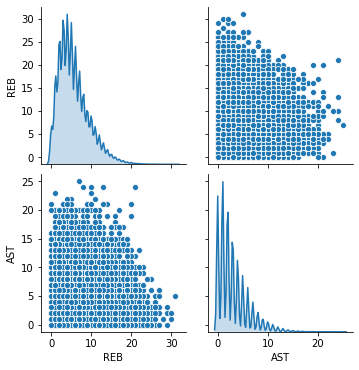

In [4]:
sns.pairplot(games_details,vars=['REB','AST'],kind="scatter",diag_kind = "kde")

As we can see, as players get more rebounds, they tend to get fewer assists, and vise versa. This implies that some players might play as center (with the most rebounds) while other players might player as point guard (with the most assists).

Now, let's take a look at the relationship between rebound and points

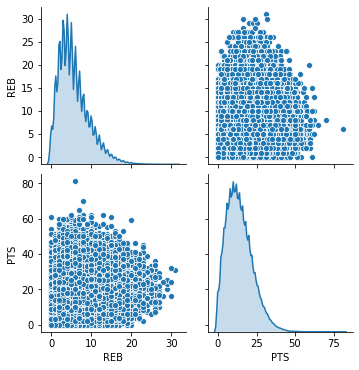

In [11]:
sns.pairplot(games_details,vars=['REB','PTS'],kind="scatter",diag_kind = "kde")

Looking at the pattern of the first scatterplot, we can't tell an obvious positive or negative correlations from the plot. We notice, however, that the players get the most rebounds when they score about 25 points. We can infer that players score over 20 points tend to get the most rebounds. We can imply that these players are pretty tall due to their height advantages of reaching rebounds. Those players tend to get high score while maintaining a solid rebound stats. Those are the players tend to be very well-rounded and therefore all-star level players. 

Our next step is to find those types of players and discover which team they are on. To do so, we need to filter out some data.

In [22]:
games_details[(games_details['PTS']>=25) & (games_details['REB']>=10)]

,GAME_ID,TEAM_ABBREVIATION,TEAM_CITY,PLAYER_NAME,START_POSITION,MIN,FGM,FGA,FG_PCT,FG3M,...,OREB,DREB,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS
540231,11400091,SAC,Sacramento,DeMarcus Cousins,C,35:53,12.0,14.0,0.857,0.0,...,1.0,10.0,11.0,4.0,2.0,1.0,10.0,5.0,32.0,-3.0
502911,11500087,IND,Indiana,Paul George,F,35:12,8.0,18.0,0.444,4.0,...,3.0,10.0,13.0,0.0,2.0,1.0,2.0,3.0,26.0,6.0
502875,11500092,NOP,New Orleans,Anthony Davis,F,40:36,8.0,24.0,0.333,0.0,...,2.0,14.0,16.0,0.0,2.0,5.0,2.0,4.0,33.0,-10.0
502409,11500104,NOP,New Orleans,Anthony Davis,F,36:03,7.0,20.0,0.350,2.0,...,4.0,9.0,13.0,5.0,1.0,5.0,3.0,4.0,25.0,21.0
465565,11600093,NOP,New Orleans,Anthony Davis,F,37:27,11.0,25.0,0.440,2.0,...,5.0,8.0,13.0,4.0,0.0,0.0,5.0,2.0,33.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
464,42000161,DEN,Denver,Nikola Jokic,C,35:21,14.0,27.0,0.519,3.0,...,3.0,13.0,16.0,1.0,0.0,0.0,1.0,1.0,34.0,-13.0
391,42000171,DAL,Dallas,Luka Doncic,G,40:46,11.0,24.0,0.458,5.0,...,1.0,9.0,10.0,11.0,1.0,2.0,3.0,3.0,31.0,19.0
402,42000171,LAC,LA,Kawhi Leonard,F,40:46,9.0,22.0,0.409,1.0,...,2.0,8.0,10.0,5.0,4.0,0.0,0.0,2.0,26.0,-15.0
167,42000172,LAC,LA,Paul George,G,40:29,12.0,22.0,0.545,1.0,...,0.0,12.0,12.0,6.0,1.0,0.0,2.0,4.0,28.0,-18.0


After filtering game details table with players scoring over 25 points and rebounding over 10 rebounds, we can easily observe that these players tend to be well-known all-star level players, which makes a lot of sense. To further exploring these data, I want to create a barplot to find which team has the most high performing players.

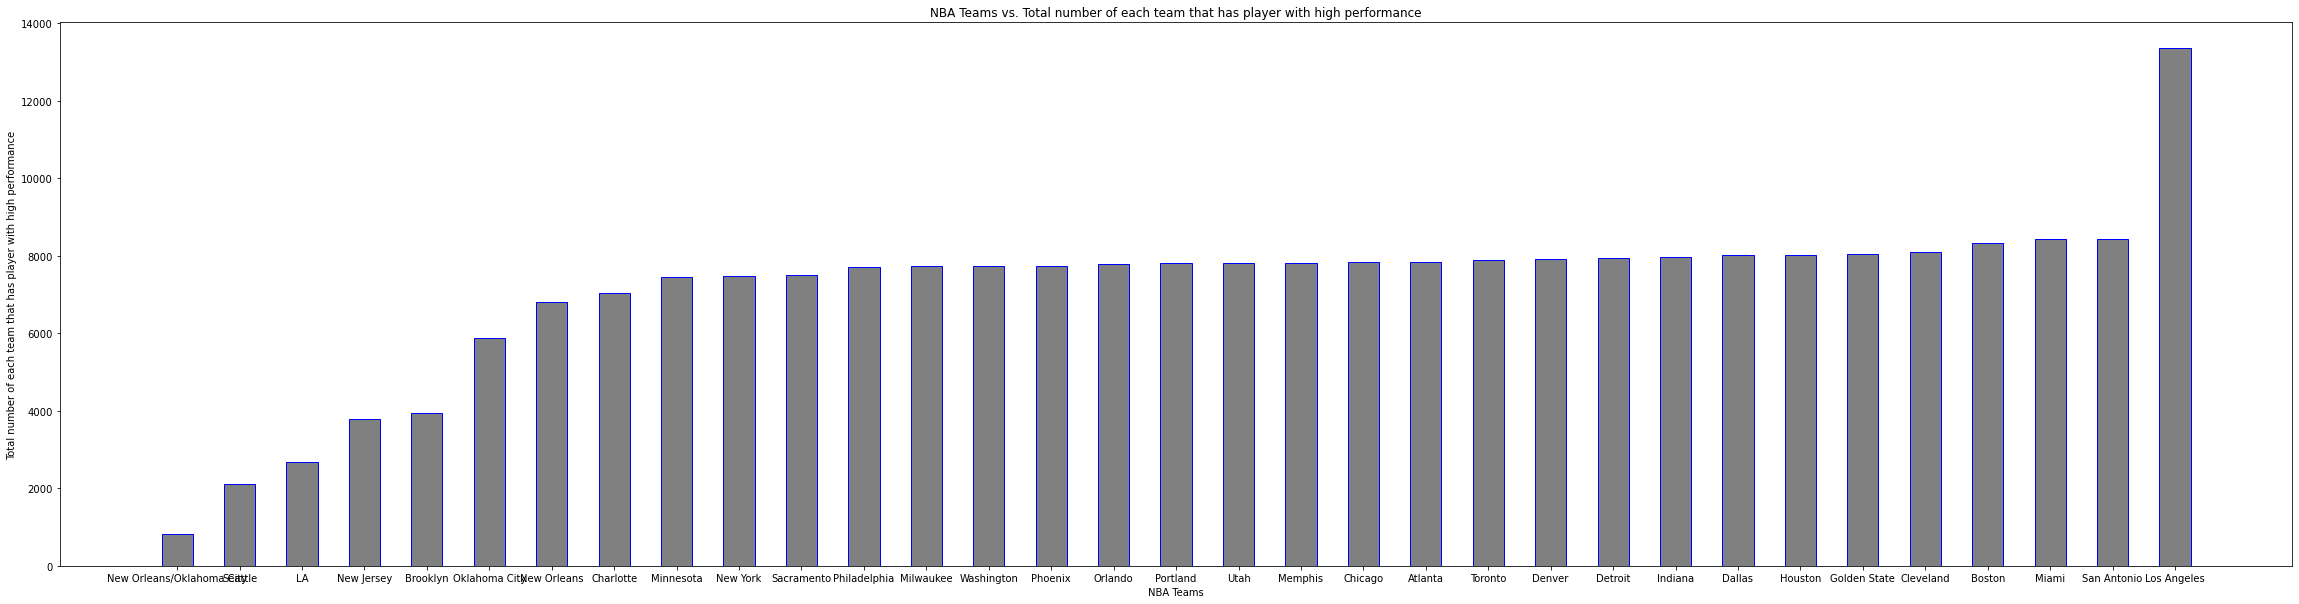

In [53]:
data = {}

for i in games_details['TEAM_CITY']:
    if i in data:
        data[i] += 1
    else:
        data[i] = 1

#data
#newdata = sorted(data.values())
#print(newdata)
sort_data = dict(sorted(data.items(), key=lambda item: item[1]))
teams = list(sort_data.keys())
totalnum = list(sort_data.values())
  
fig = plt.figure(figsize = (40, 10))

# creating the bar plot
plt.bar(teams, totalnum, color ='gray', edgecolor='blue', width = 0.5)
 
plt.xlabel("NBA Teams")
plt.ylabel("Total number of each team that has player with high performance")
plt.title("NBA Teams vs. Total number of each team that has player with high performance")
plt.show()

The barplot shows the relationship between NBA teams and total number of games each team has high performing player in an ascending order. The top five teams are cities like LA, San Antonio, Miami, Boston, and Cleveland. From many years of watching the NBA, Los Angeles is no doubt attracts many all-star level nba players, as it has Lakers and Clippers. Following that is the San Antonio Spurs which is known for its big three. Then, the Boston Celtics is one of the hottest teams as it has won the most championships in the history. Overall, we can conclude that teams in bigger cities (LA, Boston) and franchise history attracts more higher performing players who score over 25 points per game and getting more than 10 rebounds per game. Those teams are very likely to win the championship.

However, we are more curious about how the NBA teams perform in 2020-2021 season. So let's just dive into more data

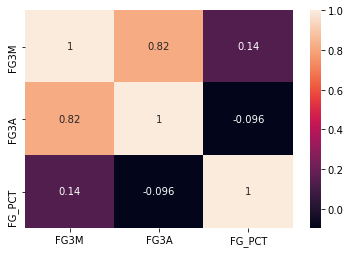

In [16]:
#Make a heatmap to see correlations
correlations1 = games_details[['FG3M','FG3A','FG_PCT']].corr()
sns.heatmap(correlations1, annot=True)

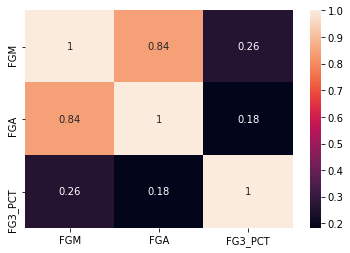

In [6]:
#Make a heatmap to see correlations
correlations2 = games_details[['FGM','FGA','FG3_PCT']].corr()
sns.heatmap(correlations2, annot=True)

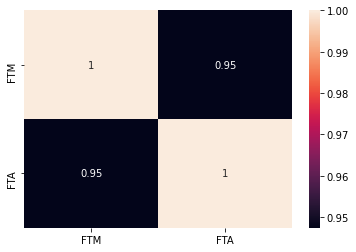

In [7]:
correlations3 = games_details[['FTM','FTA']].corr()
sns.heatmap(correlations3, annot=True)

In [8]:
#print("games")
#games.sort_values(by="GAME_DATE_EST")

In [9]:
#print("players")
#players.sample(5)

In [10]:
#print("rankings")
#df